#SVM Demo
Use LibSVM programs to perform pattern classification using the iris dataset.

In [1]:
import numpy as  np
from google.colab import drive

# Load Data
drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/data/iris.csv', 'r') as f: 
    tmp = np.genfromtxt(f, dtype='f4', delimiter=',')
X = tmp[:,2:4]
y = (tmp[:,4] == 1).astype('float')
K = X.shape[0]

Mounted at /content/drive


In [2]:
from sklearn import svm
## Fit an SVM classifier. We can specify the 

clf = svm.SVC(kernel='linear',C=0.25)
clf.fit(X, y)


SVC(C=0.25, kernel='linear')

In [3]:
# We now explore a bit about the model
i0 = clf.support_          # indices of support vectors
nsv = clf.n_support_       # number of support vectors in class 0 and class 1
sv = clf.support_vectors_  # Support Vectors
f = clf.dual_coef_        # this is the vector f = alpha.*d


print("Number of Support Vectors for each class: " + str(nsv))
print("Chosen Support Vectors: \n" + str(sv))
print("Index of chosen Support Vectors: " + str(i0))
print("Labels of Support Vectors: " + str(y[i0]))
print("f: " + str(f))


Number of Support Vectors for each class: [3 3]
Chosen Support Vectors: 
[[3.29999995 1.        ]
 [3.29999995 1.        ]
 [3.         1.10000002]
 [1.70000005 0.5       ]
 [1.89999998 0.2       ]
 [1.89999998 0.40000001]]
Index of chosen Support Vectors: [57 93 98 23 24 44]
Labels of Support Vectors: [0. 0. 0. 1. 1. 1.]
f: [[-0.25 -0.25 -0.25  0.25  0.25  0.25]]


In [4]:
## Compute hyper-plane parameters
w = np.dot(sv.T, f.T)   # Note we need to transpose f as it is stored as a row vector not a column vector
b = clf.intercept_

print("w: \n" + str(w))
print("b: " + str(b))

w: 
[[-1.02499998]
 [-0.5       ]]
b: [2.96750003]


In [5]:
## We can test the accuracy of the model using predict
# Perform estimation based on the data
yhat = clf.predict(X)

#Compute Accuracy
Acc = 1- np.sum(np.abs(yhat - y))/K
print("Accuracy: " + str(100*Acc) + "%")

Accuracy: 100.0%


Finally we can display our decision boundary. We plot the decision boundary, margins, and highlight the support vectors.

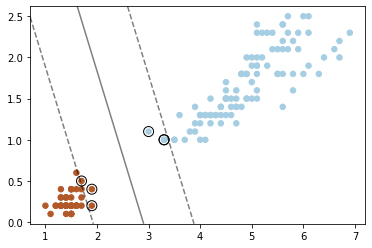

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

For more information about the SVM package, see: 

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html